In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

In [2]:
# Libraries Settings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
np.set_printoptions(suppress=True)

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 25)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
# plot function
def numerical_plotting(data, col, title, symb, ylabel, color):
    fig, ax = plt.subplots(2, 1, 
                           sharex=True, 
                           figsize=(20, 8),
                           facecolor="#FFFFFF",
                           gridspec_kw={"height_ratios": (.2, .8)})
    
    ax[0].set_facecolor("#FFFFFF")
    ax[1].set_facecolor("#FFFFFF")
    
    ax[0].set_title(title, 
                    weight="bold", 
                    fontsize=30, 
                    pad=30)
    
    sns.boxplot(x=col, 
                data=data,
                color=color,
                ax=ax[0])
    
    ax[0].set(yticks=[])
    
    sns.distplot(data[col], kde=True, color=color)
    
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    
    ax[0].set_xlabel(col, weight="bold", fontsize=15, labelpad=15)
    ax[1].set_xlabel(col, weight="bold", fontsize=15)
    ax[1].set_ylabel(ylabel, weight="bold", fontsize=15)
    
    plt.axvline(data[col].mean(), 
                color='darkgreen', 
                linewidth=2.2, 
                label='mean=' + str(np.round(data[col].mean(),1)) + symb)
    plt.axvline(data[col].median(), 
                color='red', 
                linewidth=2.2, 
                label='median='+ str(np.round(data[col].median(),1)) + symb)
    plt.axvline(data[col].max(), 
                color='blue', 
                linewidth=2.2, 
                label='max='+ str(np.round(data[col].max(),1)) + symb)
    plt.axvline(data[col].min(), 
                color='orange', 
                linewidth=2.2, 
                label='min='+ str(np.round(data[col].min(),1)) + symb)
    plt.axvline(data[col].mode()[0], 
                color='purple', 
                linewidth=2.2, 
                label='mode='+ str(data[col].mode()[0]) + symb)
    
    
    plt.legend(bbox_to_anchor=(1, 1), 
               ncol=1, 
               fontsize=17, 
               fancybox=True, 
               shadow=True, 
               frameon=False)
    
    plt.tight_layout()
    plt.show()
    
def count_pie_plot(datapie, datacount, colpiey, colcount, text1, text2, piecomap,
                   xlabel, ylabel, xticklabel, yticklabel, ystart, yend, pielabels, yplus, 
                   piefs=10, countcomap=None, pctdistance=0.65, fontsize=15, xtickrotation=None):

    # Subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   nrows=1, 
                                   facecolor=("#FFFFFF"),
                                   figsize=(24, 8))

    datapie.plot(kind="pie", 
                 y=colpiey,
                 autopct='%1.1f%%',
                 labels=None,
                 startangle=90,
                 colors=piecomap,
                 wedgeprops=dict(width=0.15),
                 pctdistance=pctdistance,
                 fontsize=piefs,
                 ax=ax1,
                 textprops=dict(color="black", 
                                weight="bold"))
    
    sns.countplot(x=colcount,
                  data=datacount,
                  palette=countcomap,
                  ax=ax2)

    #title
    x0, x1 = ax1.get_xlim()
    y0, y1 = ax1.get_ylim()
    
    ax1.text(x0, y1 * 1.40, 
             text1, 
             fontsize=30, 
             ha="left", 
             va="center", 
             weight="bold")
    ax1.text(x0, y1 * 1.25, 
             text2, 
             fontsize=18, 
             ha="left", 
             va="center")
    
    ax1.legend(pielabels, 
               loc="upper left", 
               bbox_to_anchor=(x0*0.01, y1*0.85), 
               prop={'size': 10.5}, frameon=False, ncol=len(datapie))
    
    ax2.set_xlabel(xlabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_ylabel(ylabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_xticklabels(labels=xticklabel,
                        weight="semibold",
                        fontsize=10,
                        rotation=xtickrotation)
    ax2.set_yticklabels(labels=yticklabel,
                        weight="semibold",
                        fontsize=10)

    # data label
    i=0

    for p in ax2.patches:
        value = f"{p.get_height()}"
        if (i < 2):
            y1 = -2
        else:
            y1 = 2
        i += 1
        x = p.get_x() + p.get_width() / 2 
        y = p.get_y() + p.get_height() + yplus
        ax2.text(x, y, value, ha="center", va="center", fontsize=15, weight="semibold") 

    ax2.set_ylim(ystart, yend)
    ax2.set_facecolor("#FFFFFF")
    ax1.set_ylabel(None)
    
    plt.tight_layout()
    return fig

def countplot_y(data, xplus, coly, sizey, text1, text2, 
                xlabel, ylabel, xstart, xend, ytimes1, ytimes2):

    fig, ax = plt.subplots(ncols=1,
                           nrows=1,
                           facecolor=("#FFFFFF"),
                           figsize=(24, sizey))

    sns.countplot(y=coly,
                  data=data,
                  palette=['#E0144C', '#FF5858', '#3AB0FF', '#FFB562', '#6FEDD6', '#6D9885'],
                  ax=ax)

    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()

    ax.text(x0, y1 * ytimes1, 
            text1, fontsize=30, 
            ha="left", va="center", weight="bold")
    ax.text(x0, y1 * ytimes2, 
            text2, fontsize=18, 
            ha="left", va="center")

    plt.xticks(weight="bold",
               fontsize=10)
    plt.yticks(weight="bold",
               fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=25, labelpad=20)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=25, labelpad=20)

    # data label
    i=0

    for p in ax.patches:
        value = f'{p.get_width()}'
        if i < 7:
            x1 = -1.2
        else:
            x1 = 1.2

        i+=1
        x = p.get_x() + p.get_width() + xplus
        y = p.get_y() + p.get_height() -.4
        ax.text(x, y, value, ha='center', va='center', fontsize=15, weight='semibold') 

    plt.tight_layout()
    ax.set_xlim(xstart, xend)
    ax.set_facecolor("#FFFFFF")
    
    return fig

def bivariate_numerical_plot(data, x, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(20, 6), 
                           facecolor="#FFFFFF")
    sns.kdeplot(data=data, 
                x=x, 
                hue=hue, 
                fill=True)
    
    ax.set_facecolor("#FFFFFF")
    
    plt.title(title, weight="bold", 
              fontsize=25, pad=30)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.tight_layout()
    plt.show()
    
def mtvboxplot(data, x, y, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(24, 8))
    sns.boxplot(x=x, y=y, hue=hue, 
                data=data, ax=ax)
    plt.title(title, weight="bold", 
              fontsize=25, pad=25)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.tight_layout()
    plt.show()

In [4]:
# stat function

def spearman_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Spearman's Correlation
    coef, p = stats.spearmanr(data1, data2)
    print(f"Spearmans correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def pearson_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Pearson's Correlation
    coef, p = stats.pearsonr(data1, data2)
    print(f"Pearson correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def skew_kurtosis(data, title):
    skw = stats.skew(data, bias=False)
    kurt = stats.kurtosis(data, bias=False)
    
    print("-" * 20, title, "-" * 20)
    print(f"Skewness: {skw}")
    if (skw < -1) and (skw > 1):
        print("Highly skewed")
    elif (-1 < skw < -0.5) or (1 < skw < 0.5):
        print("Moderately skewed")
    elif (-0.5 < skw < 0.5):
        print("Approximately symmetric")
    print("-" * 35)
    print(f"Kurtosis: {kurt}")
    if (kurt > 1):
        print("The distribution is too peaked")
    elif (kurt < -1):
        print("The distribution is too flat")
    else:
        print("The distribution is non-normal")
    print("-" * 35)
    
def chebychev(data, title, interpret):
    mu = round(data.mean(), 1)
    s = round(data.std(), 1)
    
    fc = round(mu - (2 * s), 1)
    sc = round(mu + (2 * s), 1)
    
    print("-" * 20, f"Interpretation of {title}", "-" * 20)
    print(f"first calc: {fc}")
    print(f"second calc: {sc}")
    print(interpret)
    print("-" * 40)

### 1.4 | Dataset Problems

##### An organization wants to predict who possible defaulters are for the consumer loans product. 
##### They have data about historic customer behavior based on what they have observed. Hence when 
##### they acquire new customers they want to predict who is riskier and who is not.


In [5]:
df = pd.read_csv('data/Training Data.csv')

In [6]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [7]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

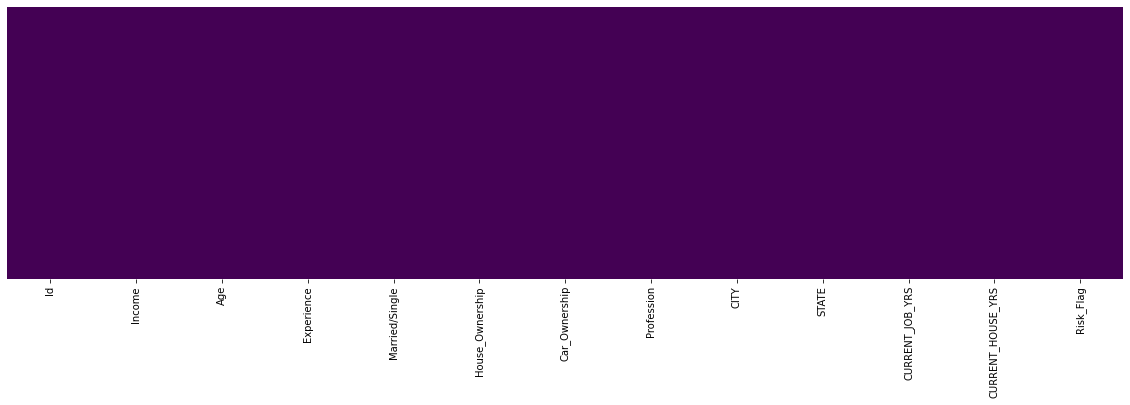

In [8]:
# plotting null values
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.plot

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


### Uniqueness Categorical Variables
#### Let's have a look at categorical variables. How many unique values of these variables

In [10]:
categorical = df.select_dtypes(["category", "object"]).columns

In [11]:
categorical

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'], dtype='object')

In [12]:
for cat_col in categorical:
    print(f"{cat_col}: {df[cat_col].nunique()} uniqueness variable")

Married/Single: 2 uniqueness variable
House_Ownership: 3 uniqueness variable
Car_Ownership: 2 uniqueness variable
Profession: 51 uniqueness variable
CITY: 317 uniqueness variable
STATE: 29 uniqueness variable


### Discrete and Continuous Variables
##### Let's have a look at Discrete and Continuous variables.

In [13]:
numeric = df.select_dtypes(["int", "float"]).columns

In [14]:
for num_col in numeric:
    print(f"{num_col}: {df[num_col].nunique()} uniqueness variable")

Id: 252000 uniqueness variable
Income: 41920 uniqueness variable
Age: 59 uniqueness variable
Experience: 21 uniqueness variable
CURRENT_JOB_YRS: 15 uniqueness variable
CURRENT_HOUSE_YRS: 5 uniqueness variable
Risk_Flag: 2 uniqueness variable


#### How many missing data points do we have?¶
##### Let's see how many missing data we have in each column....

In [15]:
# Get the number of missing data points per column
missing_values_count = df.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]

Id                 0
Income             0
Age                0
Experience         0
Married/Single     0
House_Ownership    0
Car_Ownership      0
Profession         0
CITY               0
STATE              0
dtype: int64

##### Great! there's no missing value! let's see the unique variables on the categorical data!

In [16]:
df.Profession.unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [17]:
df.CITY.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [18]:
df.STATE.unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

##### Note:
###### We can see above that there are many City names and also State that have a parantheses 
###### bracket characters and numbers that are not clear what they mean, let's clean that up later.

###### This dataset column is very inconsistent and neat, this can cause confusion or typing errors
###### in the future, let's change it so we can more easily analyze and predict it later.

## Data Cleaning
### 4.1 Checking and cleaning

In [19]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership',
       'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [20]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'income', 'age', 'experience', 'married/single', 'house_ownership', 'car_ownership',
       'profession', 'city', 'state', 'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

In [21]:
df.rename(columns={"married/single": "married_single"}, inplace=True)
df.columns

Index(['id', 'income', 'age', 'experience', 'married_single', 'house_ownership', 'car_ownership',
       'profession', 'city', 'state', 'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

##### Great! now into the city and state variables, let's clean the characters!

In [22]:
df.city = df.city.str.extract("([A-Za-z]+)")
df.city.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar', 'Tiruchirappalli',
       'Jalgaon', 'Tiruppur', 'Jamnagar', 'Kota', 'Karimnagar', 'Hajipur',
       'Adoni', 'Erode', 'Kollam', 'Madurai', 'Anantapuram', 'Kamarhati',
       'Bhusawal', 'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad',
       'Ajmer', 'Ongole', 'Miryalaguda', 'Ambattur', 'Indore',
       'Pondicherry', 'Shimoga', 'Chennai', 'Gulbarga', 'Khammam',
       'Saharanpur', 'Gopalpur', 'Amravati', 'Udupi', 'Howrah',
       'Aurangabad', 'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar',
       'Bellary', 'Danapur', 'Purnia', 'Bijapur', 'Patiala', 'Malda',
       'Sagar', 'Durgapur', 'Junagadh', 'Singrauli', 'Agartala',
       'Thanjavur', 'Hindupur', 'Naihati', 'North', 'Panchkula',
       'Anantapur', 'Serampore', 'Bathinda', 'Nadiad', 'Kanpur',
       'Haridwar', 'Berhampur', 'Jamshedpur', 'Hyderabad', 'Bidar',
       'Kottayam', 'Solapur', 'Suryapet', 'Aizawl', 'Asansol', 'Deoghar',
       'Eluru', 'Ulhasnagar', 'Aligarh'

##### Great! now state variable

In [23]:
df.state = df.state.str.extract("([A-Za-z]+)")
df.state.unique()

array(['Madhya', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil', 'Gujarat',
       'Rajasthan', 'Telangana', 'Bihar', 'Andhra', 'West', 'Haryana',
       'Puducherry', 'Karnataka', 'Uttar', 'Himachal', 'Punjab',
       'Tripura', 'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam', 'Jammu',
       'Delhi', 'Chhattisgarh', 'Chandigarh', 'Manipur', 'Sikkim'],
      dtype=object)

#### 4.2 Random Under-Sampling

In [24]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)

In [25]:
# amount of fraud classes 492 rows.
risk_data = df.loc[df["risk_flag"] == 1]
not_risk_data = df.loc[df["risk_flag"] == 0][:30996]

normal_distributed_data = pd.concat([risk_data, not_risk_data])

In [26]:
# Shuffle dataframe rows
loan = normal_distributed_data.sample(frac=1, random_state=42)

loan.head()

,id,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
125015,125016,6991135,31,16,single,norent_noown,yes,Fashion_Designer,Mehsana,Gujarat,11,11,0
2645,2646,1273453,61,12,married,rented,no,Technical_writer,Khammam,Telangana,3,11,0
121325,121326,7643432,66,17,single,rented,no,Librarian,Belgaum,Karnataka,8,13,0
42876,42877,1871076,52,18,single,rented,no,Artist,Bettiah,Bihar,3,10,1
19935,19936,1025043,75,5,single,rented,no,Drafter,Tenali,Andhra,5,10,1


#### 4.3 | Equally Distributing and Correlating

Distribution of the risk_flag in the subsample dataset
0   0.500
1   0.500
Name: risk_flag, dtype: float64


<AxesSubplot:xlabel='risk_flag', ylabel='count'>

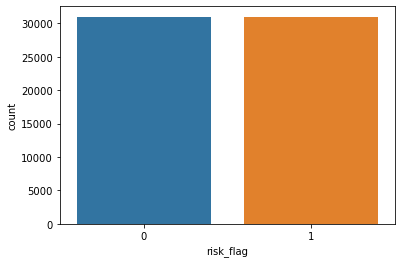

In [27]:
print("Distribution of the risk_flag in the subsample dataset")
print(loan["risk_flag"].value_counts() / len(loan))

# sns.countplot("risk_flag", data=loan)
# plt.title('Equally Distributed Risk Flag', fontsize=14);

sns.countplot(x=loan["risk_flag"])
plt.show()

##### Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.

### 5. | Data Analysis

##### 5.1 | Descriptive Statistics

In [28]:
loan.describe(exclude=[np.number])

,married_single,house_ownership,car_ownership,profession,city,state
count,61992,61992,61992,61992,61992,61992
unique,2,3,2,51,316,28
top,single,rented,no,Physician,Srinagar,Uttar
freq,56103,57544,44194,1459,346,7109


In [29]:
loan.describe(include=[np.number])

,id,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,61992.000,61992.000,61992.000,61992.000,61992.000,61992.000,61992.000
mean,128702.251,4986895.339,49.557,9.875,6.269,11.998,0.500
std,76245.859,2898380.644,17.206,6.043,3.683,1.398,0.500
min,3.000,10310.000,21.000,0.000,0.000,10.000,0.000
25%,61967.250,2462237.250,34.000,5.000,3.000,11.000,0.000
50%,128691.500,4990273.000,50.000,10.000,6.000,12.000,0.500
75%,198965.250,7511925.500,65.000,15.000,9.000,13.000,1.000
max,251999.000,9999180.000,79.000,20.000,14.000,14.000,1.000


In [30]:
# Grouping profession by its income in min, max, and mean
loan.groupby("profession")["income"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

profession,Drafter,Secretary,Computer_hardware_engineer,Computer_operator,Analyst,Official,Politician,Industrial_Engineer,Police_officer,Biomedical_Engineer,Physician,Geologist,Psychologist,Comedian,Technology_specialist,Engineer,Hotel_Manager,Chemical_engineer,Mechanical_engineer,Technician,Magistrate,Civil_engineer,Firefighter,Web_designer,Statistician,Designer,Chef,Artist,Lawyer,Air_traffic_controller,Aviator,Surveyor,Architect,Graphic_Designer,Financial_Analyst,Scientist,Consultant,Army_officer,Microbiologist,Software_Developer,Dentist,Petroleum_Engineer,Technical_writer,Flight_attendant,Civil_servant,Design_Engineer,Economist,Chartered_Accountant,Fashion_Designer,Librarian,Surgeon
min,64805.000,84491.000,87298.000,41719.000,11550.000,212833.000,16909.000,21995.000,70077.000,51974.000,12608.000,62100.000,70387.000,13429.000,41041.000,10310.000,17801.000,26926.000,47866.000,16045.000,67459.000,36017.000,29380.000,57769.000,46244.000,12841.000,15016.000,31297.000,64122.000,33649.000,82797.000,11114.000,25096.000,10675.000,80183.000,28561.000,28519.000,12902.000,12825.000,51528.000,33496.000,80603.000,11799.000,11695.000,11430.000,53886.000,16890.000,15613.000,12766.000,59715.000,18215.000
max,9999180.000,9998070.000,9994501.000,9993961.000,9992133.000,9991569.000,9989842.000,9988210.000,9987955.000,9987812.000,9987805.000,9987388.000,9985964.000,9984878.000,9984686.000,9983889.000,9983764.000,9983323.000,9982889.000,9982680.000,9982430.000,9981494.000,9980725.000,9980350.000,9978516.000,9978110.000,9977117.000,9976619.000,9976302.000,9975789.000,9975199.000,9974780.000,9974540.000,9973420.000,9972303.000,9970052.000,9967854.000,9967074.000,9962662.000,9962479.000,9959440.000,9951610.000,9945173.000,9939884.000,9938741.000,9934179.000,9932245.000,9926354.000,9915463.000,9908353.000,9897868.000
mean,4346645.223,5415843.583,5277345.576,4990132.589,4941440.142,4662860.722,4720152.959,4983378.455,4385123.192,5200285.532,4688266.406,4833554.253,5342757.564,5143793.512,4902217.453,4681646.406,4779832.457,5595696.373,4970303.933,5249444.034,4655427.289,5121620.288,4996062.312,5046557.933,4838863.524,5402229.517,4982102.409,4961469.619,5256604.559,4834458.234,4991142.104,5360232.295,5145117.714,4711616.673,4842282.018,5760428.340,4666350.540,5501978.898,4979317.842,4594895.652,4905022.204,5355874.430,5156070.089,4623424.607,4818383.629,4683658.970,4805380.481,5212642.398,5050614.271,4875291.203,5184754.832


In [31]:
# The average risk percentage of each city
loan.groupby(["city"]).risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

city,Bhubaneswar,Gwalior,Kochi,Sikar,Ahmedabad,Purnia,Bettiah,Kavali,Mathura,Bardhaman,Hazaribagh,Barasat,Mysore,Muzaffarnagar,Kottayam,Raiganj,Indore,Satna,Gandhidham,Varanasi,Imphal,Buxar,Ghaziabad,Dewas,Guntur,Ratlam,Ramagundam,Thiruvananthapuram,Udaipur,Ujjain,...,South,Pimpri,Kozhikode,Bhalswa,Khora,Noida,Bhagalpur,Orai,Ahmednagar,Farrukhabad,Hosur,Lucknow,Warangal,Raichur,Tadipatri,Belgaum,Bareilly,Panihati,Gangtok,Berhampur,Latur,Rajpur,Mehsana,Sultan,Katni,Mira,Bangalore,Bijapur,Gandhinagar,Dehradun
risk_flag,82.158,74.009,71.261,71.004,70.745,70.659,69.318,69.288,68.868,68.326,68.235,68.212,68.201,67.805,67.778,67.717,67.516,67.442,67.078,66.667,66.304,65.896,65.552,64.881,64.372,64.179,64.017,63.322,63.243,63.158,...,31.548,31.443,31.293,30.806,30.769,30.233,30.201,29.944,29.457,28.972,28.829,28.777,28.409,26.923,26.804,25.000,24.719,24.260,23.932,23.853,23.711,23.256,23.129,21.951,21.429,21.260,21.094,21.053,18.280,16.429


In [32]:
# The average risk percentage of each state
loan.groupby("state").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

state,Manipur,Tripura,Jammu,Kerala,Madhya,Odisha,Chhattisgarh,Rajasthan,Assam,Telangana,Jharkhand,Bihar,West,Himachal,Puducherry,Mizoram,Haryana,Gujarat,Andhra,Uttar,Maharashtra,Delhi,Tamil,Karnataka,Chandigarh,Punjab,Uttarakhand,Sikkim
risk_flag,66.304,61.261,58.471,58.049,56.964,55.058,54.536,54.240,51.926,51.826,51.420,51.403,51.156,50.917,50.453,50.267,50.077,49.907,48.787,48.389,47.043,45.411,45.409,44.234,42.361,40.208,34.456,23.932


In [33]:
# The average risk percentage of each profession
loan.groupby("profession").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

profession,Police_officer,Army_officer,Surveyor,Chartered_Accountant,Geologist,Software_Developer,Scientist,Air_traffic_controller,Civil_engineer,Technical_writer,Secretary,Official,Aviator,Firefighter,Biomedical_Engineer,Technician,Architect,Microbiologist,Hotel_Manager,Computer_hardware_engineer,Analyst,Computer_operator,Chef,Consultant,Psychologist,Flight_attendant,Lawyer,Comedian,Fashion_Designer,Statistician,Physician,Magistrate,Surgeon,Civil_servant,Chemical_engineer,Artist,Librarian,Graphic_Designer,Engineer,Politician,Mechanical_engineer,Dentist,Financial_Analyst,Design_Engineer,Web_designer,Drafter,Designer,Economist,Industrial_Engineer,Petroleum_Engineer,Technology_specialist
risk_flag,57.401,57.039,56.667,56.557,56.544,56.518,55.870,53.840,53.181,53.044,52.758,52.457,52.365,52.218,52.195,51.957,51.431,50.880,50.871,50.735,50.580,50.572,50.493,50.377,50.306,50.198,50.080,49.489,49.117,48.871,48.663,48.602,48.418,48.162,47.780,47.756,47.754,47.604,47.515,47.436,46.898,46.578,46.469,46.000,45.588,44.915,44.543,44.336,43.973,40.093,38.600


In [34]:
# The average risk percentage whether the customer married or single
loan.groupby("married_single").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

married_single,single,married
risk_flag,50.550,44.761


In [35]:
# The average risk percentage whether the customer owned car or not
loan.groupby("car_ownership").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

car_ownership,no,yes
risk_flag,51.050,47.393


### 5.1.1 | Conclusion

##### Top 5 professions by its mean income

In [36]:
loan.groupby("profession")["income"].agg(["min", "max", "mean"]).sort_values(by="mean", ascending=False).head()

,min,max,mean
profession,,,
Scientist,28561,9970052,5760428.340
Chemical_engineer,26926,9983323,5595696.373
Army_officer,12902,9967074,5501978.898
Secretary,84491,9998070,5415843.583
Designer,12841,9978110,5402229.517


##### Top 5 risk flag average Percentage of City:

In [37]:
loan.groupby(["city"]).risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().head()

,risk_flag
city,
Bhubaneswar,82.158
Gwalior,74.009
Kochi,71.261
Sikar,71.004
Ahmedabad,70.745


##### Top 5 risk flag average Percentage of State:

In [38]:
loan.groupby("state").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().head()

,risk_flag
state,
Manipur,66.304
Tripura,61.261
Jammu,58.471
Kerala,58.049
Madhya,56.964


##### Top 5 risk flag average Percentage of Profession:

In [39]:
loan.groupby("profession").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().head()

,risk_flag
profession,
Police_officer,57.401
Army_officer,57.039
Surveyor,56.667
Chartered_Accountant,56.557
Geologist,56.544


##### The average risk percentage whether the customer Married or Single:

In [40]:
loan.groupby("married_single").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame()

,risk_flag
married_single,
single,50.550
married,44.761


##### The average risk percentage whether the customer owned car or not:

In [41]:
loan.groupby("car_ownership").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame()

,risk_flag
car_ownership,
no,51.050
yes,47.393


### 5.2 | Univariate Analysis

##### Chebychev's Theorem

##### Chebyshev's Theorem estimates the minimum proportion of observations 
##### that fall within a specified number of standard deviations from the mean. 
##### This theorem applies to a broad range of probability distributions.
##### Chebyshev's Theorem is also known as Chebyshev's Inequality


#### About skewness:

##### As a general rule of thumb: If skewness is less than  −1  or greater than  1 , the distribution is highly skewed. 
##### If skewness is between  −1  and  −0.5  or between  0.5  and  1 , the distribution is moderately skewed.
##### If skewness is between  −0.5  and  0.5 , the distribution is approximately symmetric.

#### About kurtosis:

##### For kurtosis, the general guideline is that if the number is greater than  +1 , the distribution is too peaked.
##### Likewise, a kurtosis of less than  −1  indicates a distribution that is too flat.
##### Distributions exhibiting skewness and/or kurtosis that exceed these guidelines are considered non-normal.

#### 5.2.1 | Numerical Column

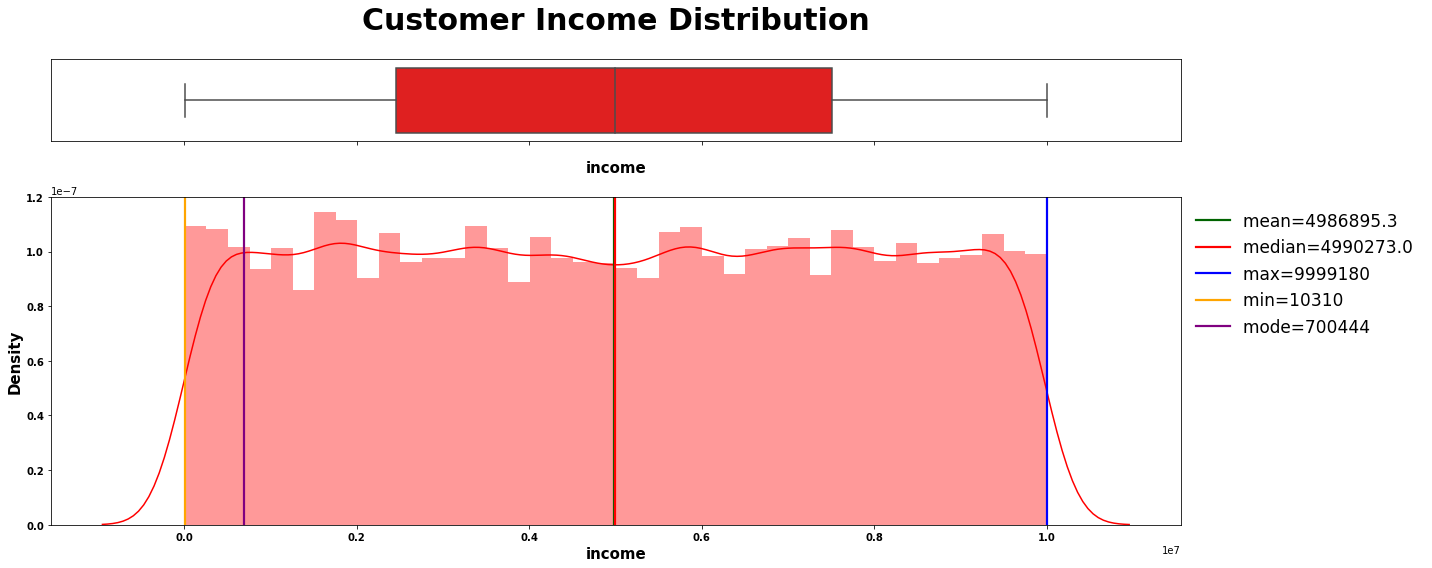

In [42]:
numerical_plotting(data=loan, col="income", 
                   title="Customer Income Distribution", 
                   symb=" ", ylabel="Density", color="red");

##### 5.2.1.1 | Notes:

In [43]:
chebychev(loan.income, title="Income", 
          interpret=f"at least 75% customer income is lies between 0 and 10.785.254 Rupee")

-------------------- Interpretation of Income --------------------
first calc: -809865.9
second calc: 10783656.5
at least 75% customer income is lies between 0 and 10.785.254 Rupee
----------------------------------------


In [44]:
skew_kurtosis(loan.income, "Skew & Kurtosis Income")

-------------------- Skew & Kurtosis Income --------------------
Skewness: 0.0005018870561822507
Approximately symmetric
-----------------------------------
Kurtosis: -1.2117528217436715
The distribution is too flat
-----------------------------------


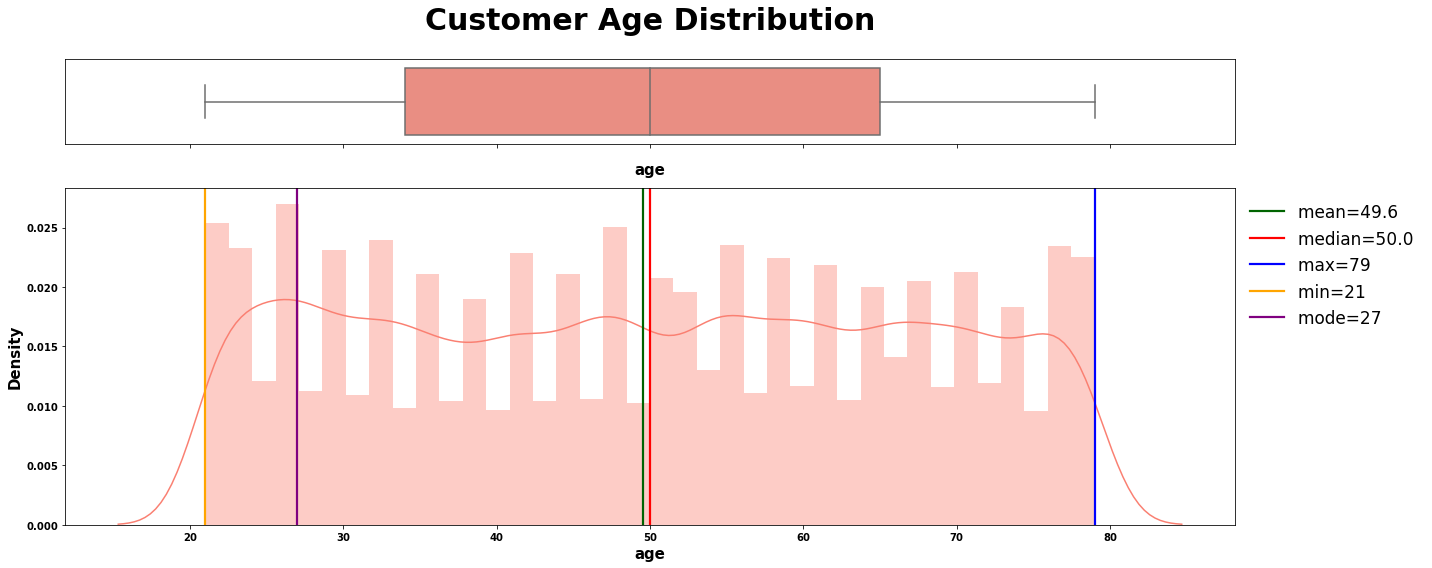

In [45]:
numerical_plotting(data=loan, col="age", 
                   title="Customer Age Distribution", 
                   symb=" ", ylabel="Density", color="salmon");

##### 5.2.1.2 | Notes

In [46]:
chebychev(loan.age, title="Age", 
          interpret=f"at least 75% customer age is lies between 0 and 84")

-------------------- Interpretation of Age --------------------
first calc: 15.2
second calc: 84.0
at least 75% customer age is lies between 0 and 84
----------------------------------------


In [47]:
skew_kurtosis(loan.age, "Skew & Kurtosis Age")

-------------------- Skew & Kurtosis Age --------------------
Skewness: 0.01379250549593762
Approximately symmetric
-----------------------------------
Kurtosis: -1.2168853924972685
The distribution is too flat
-----------------------------------


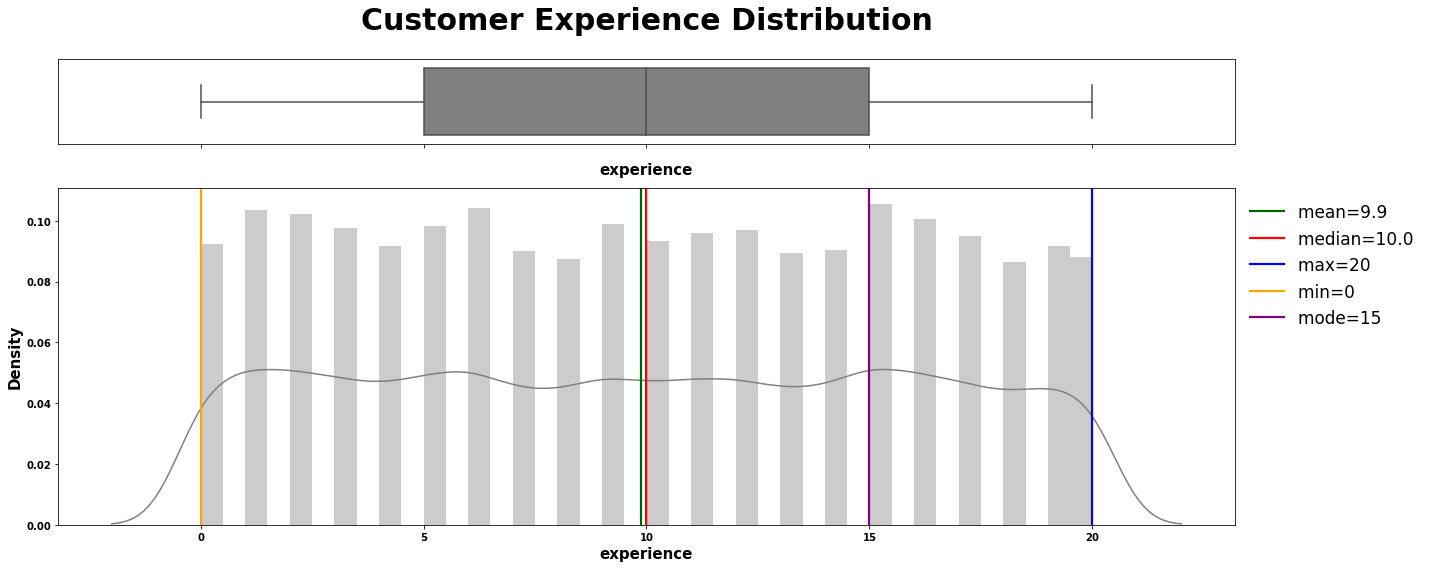

In [48]:
numerical_plotting(data=loan, col="experience", 
                   title="Customer Experience Distribution", 
                   symb=" ", ylabel="Density", color="gray");

##### 5.2.1.3 | Notes:

In [49]:
chebychev(loan.experience, title="Experience", 
          interpret=f"at least 75% customer have 0 to 22 years professional experience of working")

-------------------- Interpretation of Experience --------------------
first calc: -2.1
second calc: 21.9
at least 75% customer have 0 to 22 years professional experience of working
----------------------------------------


In [50]:
skew_kurtosis(loan.experience, "Skew & Kurtosis Experience")

-------------------- Skew & Kurtosis Experience --------------------
Skewness: 0.01616538528240019
Approximately symmetric
-----------------------------------
Kurtosis: -1.214115856130313
The distribution is too flat
-----------------------------------


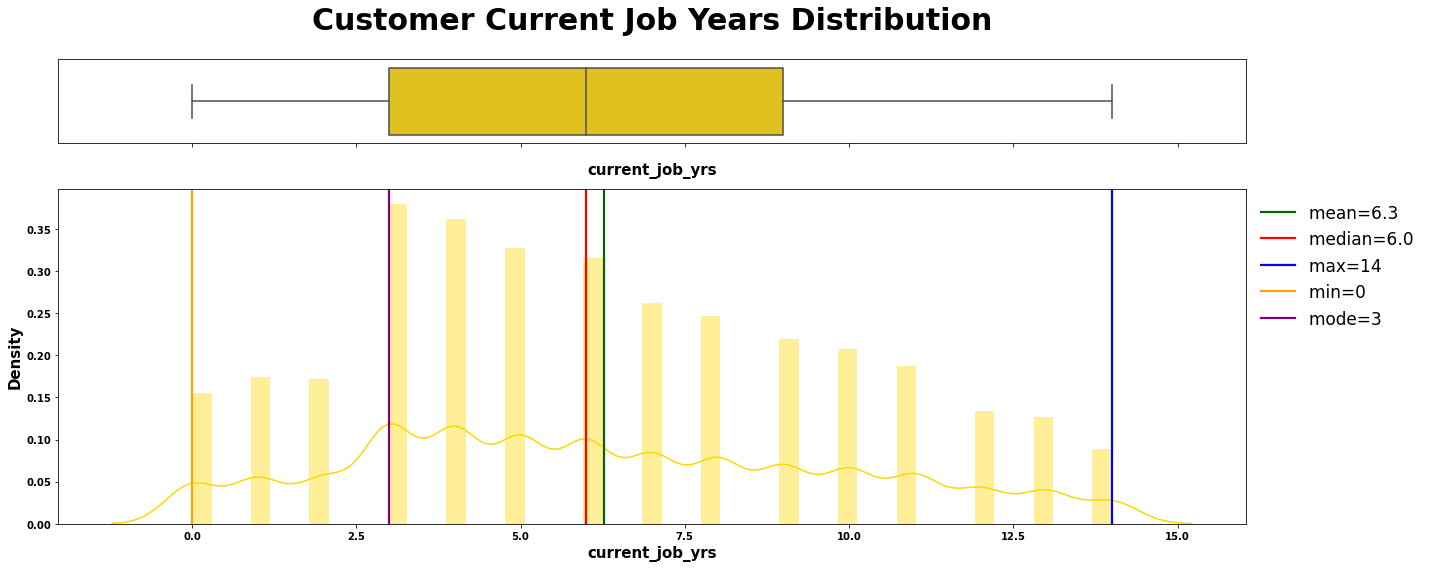

In [51]:
numerical_plotting(data=loan, col="current_job_yrs", 
                   title="Customer Current Job Years Distribution", 
                   symb=" ", ylabel="Density", color="gold");

#### 5.2.1.4 | Notes:

In [52]:
chebychev(loan.current_job_yrs, title="Current Job Years", 
          interpret=f"at least 75% customer have 0 to 13 years of work experience in current job")

-------------------- Interpretation of Current Job Years --------------------
first calc: -1.1
second calc: 13.7
at least 75% customer have 0 to 13 years of work experience in current job
----------------------------------------


In [53]:
skew_kurtosis(loan.current_job_yrs, "Skew & Kurtosis Current Job Years")

-------------------- Skew & Kurtosis Current Job Years --------------------
Skewness: 0.2743675867434884
Approximately symmetric
-----------------------------------
Kurtosis: -0.808484512184426
The distribution is non-normal
-----------------------------------


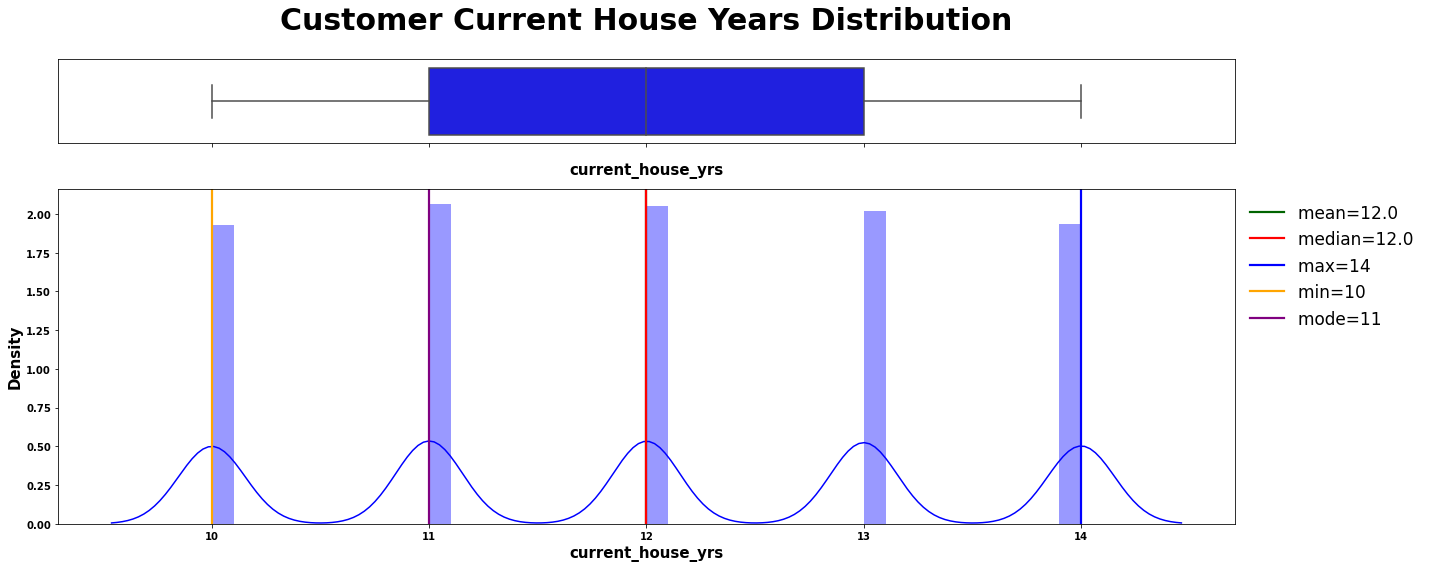

In [54]:
numerical_plotting(data=loan, col="current_house_yrs", 
                   title="Customer Current House Years Distribution", 
                   symb=" ", ylabel="Density", color="blue");

#### 5.2.1.5 | Notes:

In [55]:
chebychev(loan.current_house_yrs, title="Current House Years", 
          interpret=f"at least 75% customer have lived 9 to 15 years in the current residence")

-------------------- Interpretation of Current House Years --------------------
first calc: 9.2
second calc: 14.8
at least 75% customer have lived 9 to 15 years in the current residence
----------------------------------------
